In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import ast

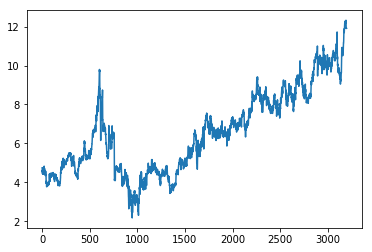

In [2]:
file = 'Data/Stocks/amswa.us.txt'
data = pd.read_csv(file)

#data = data[data.Date > '2015-01-01']
plt.plot(data.Close)
plt.show()

In [3]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [4]:
def ucgen(altsinir, a, c, b, ustsinir, xi):
    
    #print('ucgen: ', 'altisinir: ', altsinir, 'a: ', a, 'c: ', c, 'b: ', b, 'ustsinir: ', ustsinir, 'xi: ', xi)
    
    X1 = np.arange(altsinir, a, 0.5)
    X2 = np.arange(a, c, 0.5)
    X3 = np.arange(c, b, 0.5)
    X4 = np.arange(b, ustsinir, 0.5)
    
    alpha = 1
    mu_x1 = np.zeros(int((a - altsinir)*2))
    mu_x2 = alpha*(X2-a)/(c-a)
    mu_x3 = alpha*(X3-b)/(c-b)
    mu_x4 = np.zeros(int((ustsinir - b)*2))
    
    X = np.concatenate([X1, X2, X3, X4])
    mu_X = np.concatenate([mu_x1, mu_x2, mu_x3, mu_x4])
    
    mu_xi = 0
    if xi >= a and xi < c:
        mu_xi = alpha*(xi-a)/(c-a)
    elif xi >= c and xi <= b:
        mu_xi = alpha*(xi-b)/(c-b)
        
    return mu_xi, mu_X, X

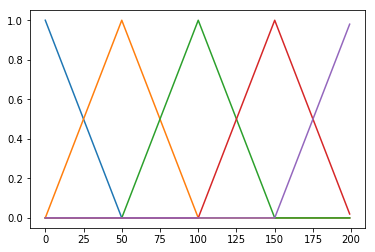

In [5]:
kal_mu, kal, kal_X = ucgen(0,0,0,25, 100, 0)
al_mu, al, al_X = ucgen(0,0,25,50,100, 0)
bekle_mu, bekle, bekle_X = ucgen(0,25,50,75,100, 0)
sat_mu, sat, sat_X = ucgen(0,50,75,100,100, 0)
ksat_mu, ksat, ksat_X = ucgen(0,75,100,100,100, 0)

plt.plot(kal)
plt.plot(al)
plt.plot(bekle)
plt.plot(sat)
plt.plot(ksat)
plt.show()


In [6]:
def kuraltabani(sma, rsi, blng, des):
    sma = ast.literal_eval(sma)
    rsi = ast.literal_eval(rsi)
    blng = ast.literal_eval(blng)
    des = ast.literal_eval(des)
    kuralsonuclari = []
    s = 0 # sayac
    for i in range(0, 3):
        for k in  range(0, 3):
            for m in  range(0, 3):
                for n in  range(0, 3):
                    kirpici = np.min([sma[i], rsi[k], blng[m], des[n]])
                    if kurallar[s][4] == 'kuvvetli al':
                        sonuc = [a*kirpici for a in kal]
                    elif kurallar[s][4] == 'al':
                        sonuc = [a*kirpici for a in al]
                    elif kurallar[s][4] == 'bekle':
                        sonuc = [a*kirpici for a in bekle]
                    elif kurallar[s][4] == 'sat':
                        sonuc = [a*kirpici for a in sat]
                    elif kurallar[s][4] == 'kuvvetli sat':
                        sonuc = [a*kirpici for a in ksat]
                    kuralsonuclari.append(sonuc)
                    s = s+1

    return kuralsonuclari

In [7]:
kurallar = []
for i in range(0, 3):
    for j in range(0, 3):
        for k in range(0, 3):
            for m in range(0, 3):
                kurallar.append([i, j, k, m])
                
print(kurallar)

[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 2], [0, 0, 1, 0], [0, 0, 1, 1], [0, 0, 1, 2], [0, 0, 2, 0], [0, 0, 2, 1], [0, 0, 2, 2], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 2], [0, 1, 1, 0], [0, 1, 1, 1], [0, 1, 1, 2], [0, 1, 2, 0], [0, 1, 2, 1], [0, 1, 2, 2], [0, 2, 0, 0], [0, 2, 0, 1], [0, 2, 0, 2], [0, 2, 1, 0], [0, 2, 1, 1], [0, 2, 1, 2], [0, 2, 2, 0], [0, 2, 2, 1], [0, 2, 2, 2], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 0, 2], [1, 0, 1, 0], [1, 0, 1, 1], [1, 0, 1, 2], [1, 0, 2, 0], [1, 0, 2, 1], [1, 0, 2, 2], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 0, 2], [1, 1, 1, 0], [1, 1, 1, 1], [1, 1, 1, 2], [1, 1, 2, 0], [1, 1, 2, 1], [1, 1, 2, 2], [1, 2, 0, 0], [1, 2, 0, 1], [1, 2, 0, 2], [1, 2, 1, 0], [1, 2, 1, 1], [1, 2, 1, 2], [1, 2, 2, 0], [1, 2, 2, 1], [1, 2, 2, 2], [2, 0, 0, 0], [2, 0, 0, 1], [2, 0, 0, 2], [2, 0, 1, 0], [2, 0, 1, 1], [2, 0, 1, 2], [2, 0, 2, 0], [2, 0, 2, 1], [2, 0, 2, 2], [2, 1, 0, 0], [2, 1, 0, 1], [2, 1, 0, 2], [2, 1, 1, 0], [2, 1, 1, 1], [2, 1, 1, 2], [2, 1, 2, 0], [2, 1, 2, 1], [2, 1

In [8]:
for i in range(0, len(kurallar)):
    if kurallar[i].count(2) >= 3:
        kurallar[i].append('kuvvetli sat')
    elif kurallar[i].count(2) >= 2:
        kurallar[i].append('sat')
    elif kurallar[i].count(0) >= 3:
        kurallar[i].append('kuvvetli al')
    elif kurallar[i].count(0) >= 2:
        kurallar[i].append('al')
    else:
        kurallar[i].append('bekle')
        
print(kurallar)

[[0, 0, 0, 0, 'kuvvetli al'], [0, 0, 0, 1, 'kuvvetli al'], [0, 0, 0, 2, 'kuvvetli al'], [0, 0, 1, 0, 'kuvvetli al'], [0, 0, 1, 1, 'al'], [0, 0, 1, 2, 'al'], [0, 0, 2, 0, 'kuvvetli al'], [0, 0, 2, 1, 'al'], [0, 0, 2, 2, 'sat'], [0, 1, 0, 0, 'kuvvetli al'], [0, 1, 0, 1, 'al'], [0, 1, 0, 2, 'al'], [0, 1, 1, 0, 'al'], [0, 1, 1, 1, 'bekle'], [0, 1, 1, 2, 'bekle'], [0, 1, 2, 0, 'al'], [0, 1, 2, 1, 'bekle'], [0, 1, 2, 2, 'sat'], [0, 2, 0, 0, 'kuvvetli al'], [0, 2, 0, 1, 'al'], [0, 2, 0, 2, 'sat'], [0, 2, 1, 0, 'al'], [0, 2, 1, 1, 'bekle'], [0, 2, 1, 2, 'sat'], [0, 2, 2, 0, 'sat'], [0, 2, 2, 1, 'sat'], [0, 2, 2, 2, 'kuvvetli sat'], [1, 0, 0, 0, 'kuvvetli al'], [1, 0, 0, 1, 'al'], [1, 0, 0, 2, 'al'], [1, 0, 1, 0, 'al'], [1, 0, 1, 1, 'bekle'], [1, 0, 1, 2, 'bekle'], [1, 0, 2, 0, 'al'], [1, 0, 2, 1, 'bekle'], [1, 0, 2, 2, 'sat'], [1, 1, 0, 0, 'al'], [1, 1, 0, 1, 'bekle'], [1, 1, 0, 2, 'bekle'], [1, 1, 1, 0, 'bekle'], [1, 1, 1, 1, 'bekle'], [1, 1, 1, 2, 'bekle'], [1, 1, 2, 0, 'bekle'], [1, 1, 2, 1

In [9]:
def birlestirmemax(birlesmissonuc):
    birlesim = []
    for i in range(0, len(birlesmissonuc[0])):
        maxs = []
        for j in birlesmissonuc:
            maxs.append(j[i])
        birlesim.append(np.max(maxs))
    return birlesim

In [10]:
def durulastirmamax(bulaniksonuc):
    z = np.argmax(bulaniksonuc)
    if z >= 0 and z < 50:
        return 'kuvvetli al'
    elif z >= 50 and z < 150:
        return 'al'
    elif z >= 100 and z < 150:
        return 'bekle'
    elif z >= 150 and z < 199: 
        return 'sat'
    elif z > 198:
        return 'kuvvetli sat'

In [11]:
def durulastirmamerkezialan(bulaniksonuc):
    toplamuyelik = sum(bulaniksonuc)
    
    z = 0
    if toplamuyelik == 0:
        print('Toplam uyelik sıfırdır!')
    else:
        z = sum([bulaniksonuc[i] * i for i in range(0, 200)])/toplamuyelik
    return z

In [12]:
def sonuccikarvedurulastir(data):
    emirler = []
    for i in range(0, len(data)):
        sonuc = kuraltabani(data.bgsma[i], data.bgrsi[i], data.bgblng[i], data.bgdes[i])
        a = birlestirmemax(sonuc)
        duru = durulastirmamax(a)
        emirler.append(duru)
        
    return emirler

In [13]:
emirler = sonuccikarvedurulastir(data)

sondata = data
try:
    sondata.insert(0, 'emir', emirler)
except:
    sondata = data.drop(columns=['emir'])
    sondata.insert(0, 'emir', emirler)

In [14]:
print(data.columns, '\n\n')
a = []
for col in sondata.columns:
    if 'Unnamed' in col:
        a.append(col)
sondata = sondata.drop(columns=a)
print(data.columns)

Index(['emir', 'Unnamed: 0', 'bgdes', 'bgblng', 'bgrsi', 'bgema', 'bgsma',
       'blngbnd', 'ema', 'sma', 'desindic', 'downBand', 'upBand', 'sigma',
       'bho20', 'rsi', 'uho21', 'uho5', 'bho21', 'bho5', 'Date', 'Close'],
      dtype='object') 


Index(['emir', 'Unnamed: 0', 'bgdes', 'bgblng', 'bgrsi', 'bgema', 'bgsma',
       'blngbnd', 'ema', 'sma', 'desindic', 'downBand', 'upBand', 'sigma',
       'bho20', 'rsi', 'uho21', 'uho5', 'bho21', 'bho5', 'Date', 'Close'],
      dtype='object')


In [15]:
# SAVE
sondata.to_csv(file, sep=',')

53.561862533515175


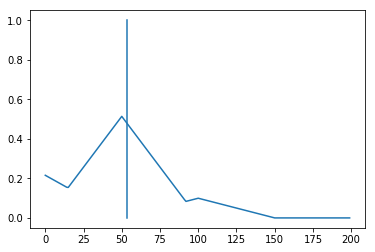

In [16]:
i = 50
sonuc = kuraltabani(data.bgsma[i], data.bgrsi[i], data.bgblng[i], data.bgdes[i])
#for b in sonuc:
#    plt.plot(b)
a = birlestirmemax(sonuc)
duru = durulastirmamerkezialan(a)
newline([duru, 0], [duru, 1])
print(duru)
plt.plot(a)
plt.show()